In [1]:
!pip install textblob wordcloud


In [2]:
from google.colab import files
uploaded = files.upload()


Saving college_event_feedback_100.csv to college_event_feedback_100.csv


In [3]:
import pandas as pd

# Load the uploaded file automatically
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Show first 5 rows
df.head()


,Response_ID,Event_Name,Department,Event_Type,Event_Date,Rating,Feedback_Text
0,1,AI Workshop,CSE,Workshop,2025-01-11,4,Speakers were really inspiring.
1,2,Cultural Night,ECE,Cultural,2025-01-18,4,"Loved the sessions, learned a lot."
2,3,Entrepreneurship Talk,MBA,Talk,2025-01-12,1,Poorly managed and started late.
3,4,Cultural Night,ECE,Cultural,2025-02-11,4,Speakers were really inspiring.
4,5,Entrepreneurship Talk,MBA,Talk,2025-01-24,4,Very informative and engaging event.


In [4]:
# Basic cleaning
df['Feedback_Text'] = df['Feedback_Text'].astype(str)

# Sentiment Analysis using TextBlob
from textblob import TextBlob

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    return polarity

df['Sentiment_Score'] = df['Feedback_Text'].apply(get_sentiment)

# Convert polarity → label
def label_sentiment(score):
    if score > 0.1:
        return "Positive"
    elif score < -0.1:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['Sentiment_Score'].apply(label_sentiment)

df.head()


,Response_ID,Event_Name,Department,Event_Type,Event_Date,Rating,Feedback_Text,Sentiment_Score,Sentiment
0,1,AI Workshop,CSE,Workshop,2025-01-11,4,Speakers were really inspiring.,0.50,Positive
1,2,Cultural Night,ECE,Cultural,2025-01-18,4,"Loved the sessions, learned a lot.",0.70,Positive
2,3,Entrepreneurship Talk,MBA,Talk,2025-01-12,1,Poorly managed and started late.,-0.35,Negative
3,4,Cultural Night,ECE,Cultural,2025-02-11,4,Speakers were really inspiring.,0.50,Positive
4,5,Entrepreneurship Talk,MBA,Talk,2025-01-24,4,Very informative and engaging event.,0.30,Positive


/tmp/ipython-input-2439904193.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, palette='viridis')


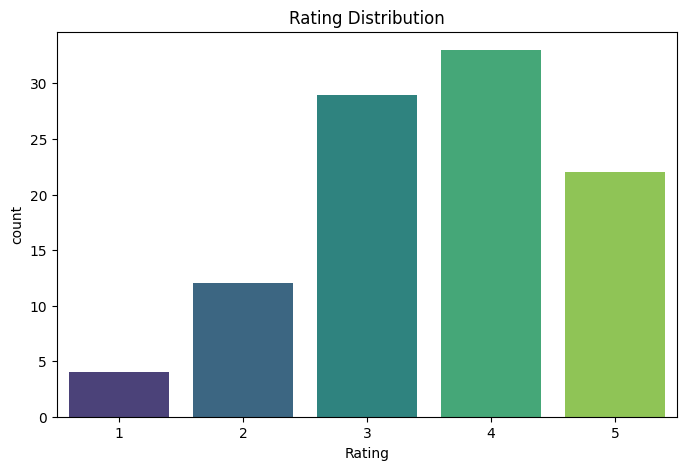

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x='Rating', data=df, palette='viridis')
plt.title("Rating Distribution")
plt.show()


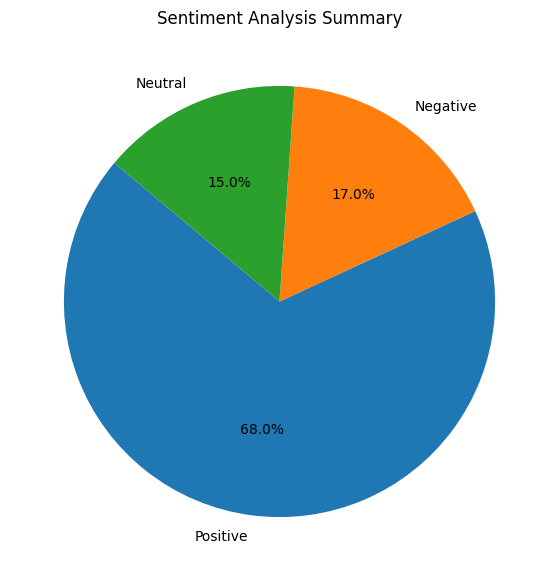

In [6]:
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Sentiment Analysis Summary")
plt.show()


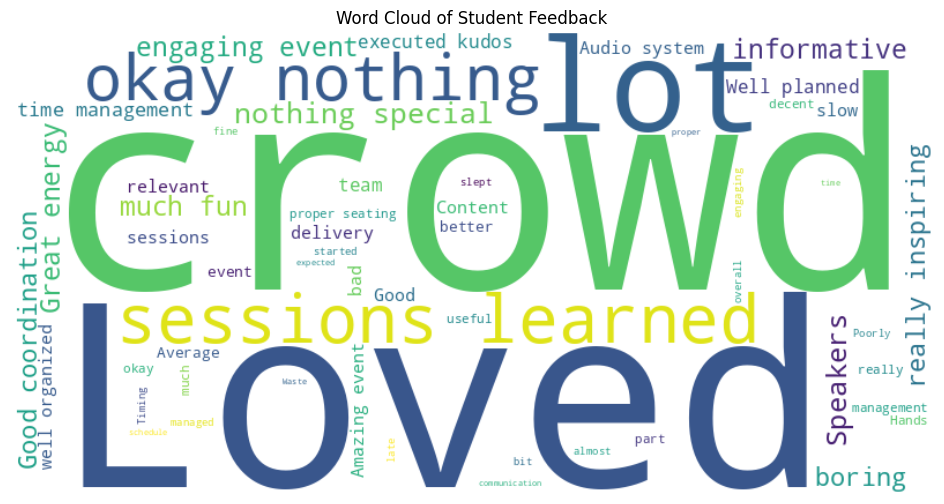

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df['Feedback_Text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Student Feedback")
plt.show()
